In [ ]:
# 1. Gerekli Kütüphanelerin Yüklenmesi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Veri Setini Yükleme
file_path = "C:/Users/Desktop/Bilge Hoca Kitap/Bilge Hoca Makale/digital_marketing_campaign_dataset.csv"
data = pd.read_csv(file_path)



In [12]:
data

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,15995,21,Male,24849,Email,Awareness,8518.308575,0.243792,0.116773,23,9.693602,14.227794,70,13,6,7,286,IsConfid,ToolConfid,0
7996,15996,43,Female,44718,SEO,Retention,1424.613446,0.236740,0.190061,49,9.499010,3.501106,52,13,1,5,1502,IsConfid,ToolConfid,0
7997,15997,28,Female,125471,Referral,Consideration,4609.534635,0.056526,0.133826,35,2.853241,14.618323,38,16,0,3,738,IsConfid,ToolConfid,1
7998,15998,19,Female,107862,PPC,Consideration,9476.106354,0.023961,0.138386,49,1.002964,3.876623,86,1,5,7,2709,IsConfid,ToolConfid,1


In [2]:
# 3. Veri Keşfi
print("Veri Setinin İlk 5 Satırı:")
print(data.head())

print("\nVeri Setinin Özeti:")
print(data.info())

print("\nEksik Verilerin Kontrolü:")
print(data.isnull().sum())

Veri Setinin İlk 5 Satırı:
   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370   

   So

In [3]:
# 4. Temel İstatistiklerin Hesaplanması
print("\nDeğişkenlerin Temel İstatistikleri:")
print(data.describe())


Değişkenlerin Temel İstatistikleri:
        CustomerID          Age         Income      AdSpend  ClickThroughRate  \
count   8000.00000  8000.000000    8000.000000  8000.000000       8000.000000   
mean   11999.50000    43.625500   84664.196750  5000.944830          0.154829   
std     2309.54541    14.902785   37580.387945  2838.038153          0.084007   
min     8000.00000    18.000000   20014.000000   100.054813          0.010005   
25%     9999.75000    31.000000   51744.500000  2523.221165          0.082635   
50%    11999.50000    43.000000   84926.500000  5013.440044          0.154505   
75%    13999.25000    56.000000  116815.750000  7407.989369          0.228207   
max    15999.00000    69.000000  149986.000000  9997.914781          0.299968   

       ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
count     8000.000000    8000.000000    8000.000000  8000.000000   
mean         0.104389      24.751625       5.549299     7.727718   
std          0.054878      14

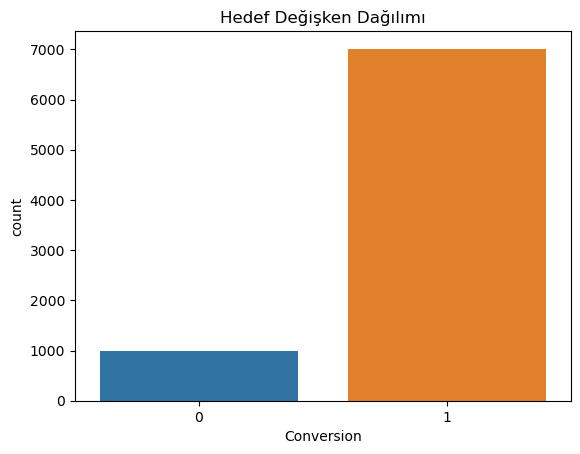

In [4]:
# 5. Hedef Değişken (Conversion) Dağılımı
sns.countplot(x='Conversion', data=data)
plt.title('Hedef Değişken Dağılımı')
plt.show()

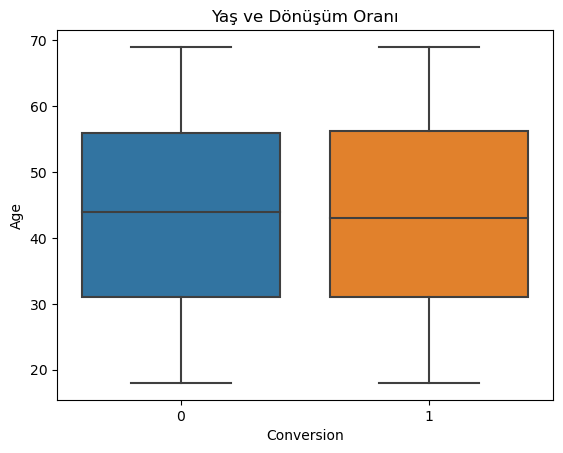

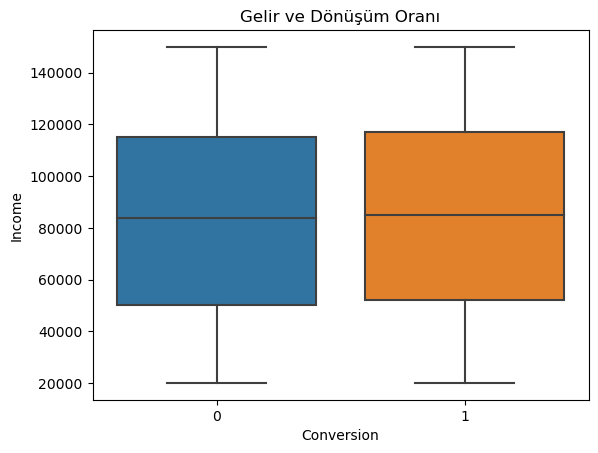

In [5]:
# 6. Demografik Değişkenlerin Analizi
sns.boxplot(x='Conversion', y='Age', data=data)
plt.title('Yaş ve Dönüşüm Oranı')
plt.show()

sns.boxplot(x='Conversion', y='Income', data=data)
plt.title('Gelir ve Dönüşüm Oranı')
plt.show()

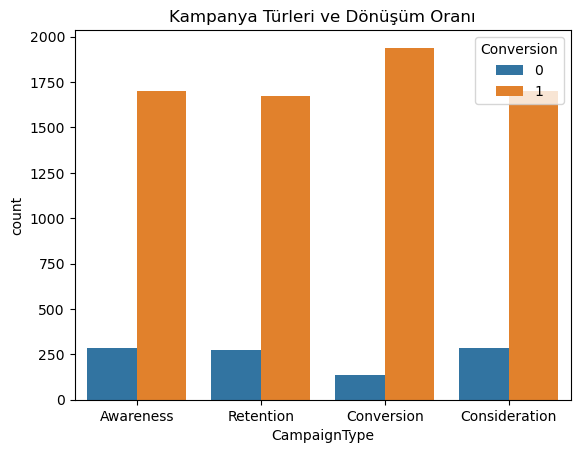

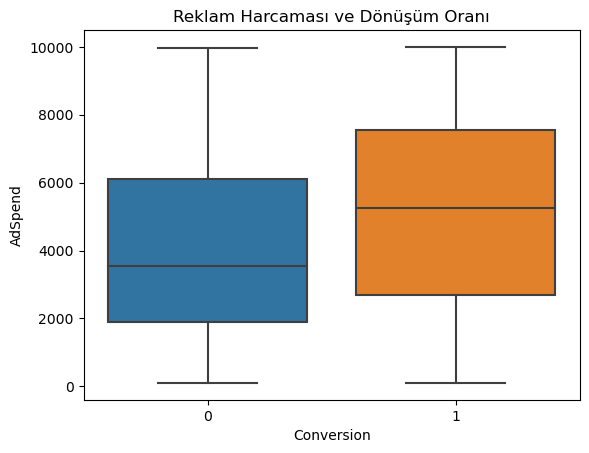

In [6]:

# 7. Pazarlama Kampanyalarının Analizi
sns.countplot(x='CampaignType', hue='Conversion', data=data)
plt.title('Kampanya Türleri ve Dönüşüm Oranı')
plt.show()

sns.boxplot(x='Conversion', y='AdSpend', data=data)
plt.title('Reklam Harcaması ve Dönüşüm Oranı')
plt.show()

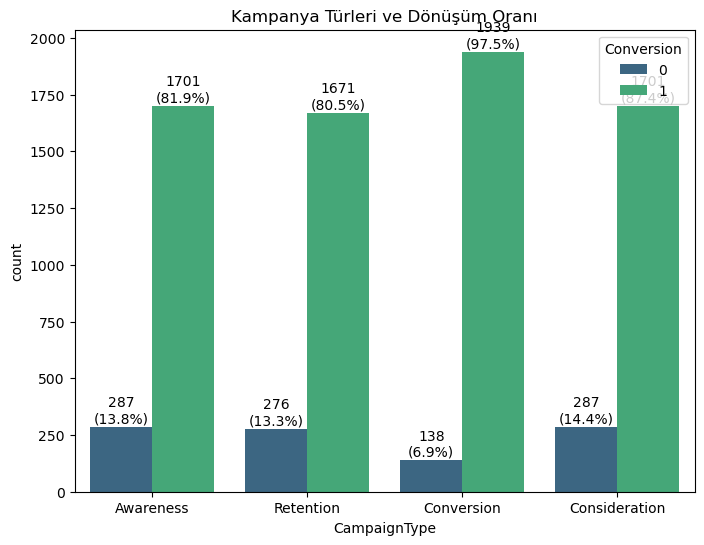

Reklam Harcaması ve Dönüşüm İstatistikleri:
             count         mean          std         min          25%  \
Conversion                                                              
0            988.0  4058.398466  2684.283677  100.054813  1881.509187   
1           7012.0  5133.750850  2834.132748  103.409243  2682.533287   

                    50%          75%          max  
Conversion                                         
0           3554.554979  6103.983738  9977.669768  
1           5249.718686  7555.075908  9997.914781  


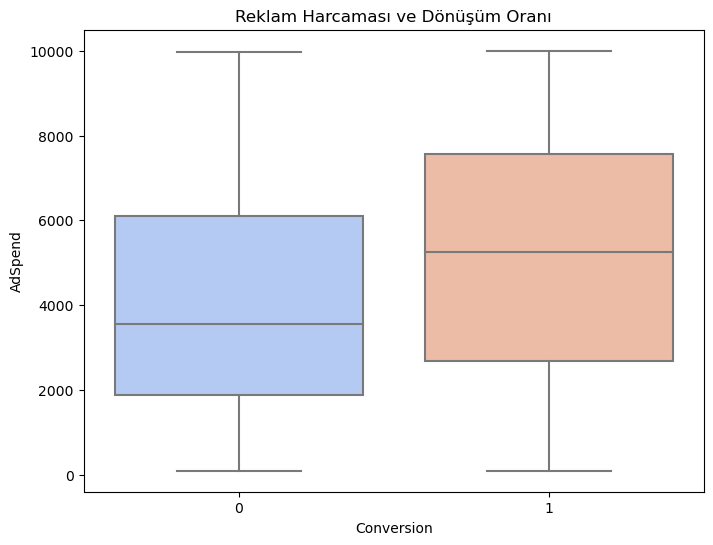

In [14]:
# Kampanya Türleri ve Dönüşüm Oranı (Countplot)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='CampaignType', hue='Conversion', data=data, palette='viridis')
plt.title('Kampanya Türleri ve Dönüşüm Oranı')

# Kampanya Türlerine göre dönüşüm oranlarını yüzdesel olarak hesaplama ve grafiğe ekleme
total_counts = data['CampaignType'].value_counts()
for container in ax.containers:
    for bar in container:
        count = int(bar.get_height())
        category = bar.get_x()
        total = total_counts.iloc[int(category)]  # İlgili kategori için toplam sayıyı al
        percentage = 100 * count / total
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 5,
            f'{count}\n({percentage:.1f}%)',
            ha='center',
            va='bottom',
            fontsize=10,
            color='black'
        )

plt.show()



# 2. Reklam Harcaması ve Dönüşüm Oranı (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Conversion', y='AdSpend', data=data, palette='coolwarm')
plt.title('Reklam Harcaması ve Dönüşüm Oranı')

# Sayısal değerleri tablo olarak yazdırma
conversion_stats = data.groupby('Conversion')['AdSpend'].describe()
print("Reklam Harcaması ve Dönüşüm İstatistikleri:")
print(conversion_stats)

plt.show()

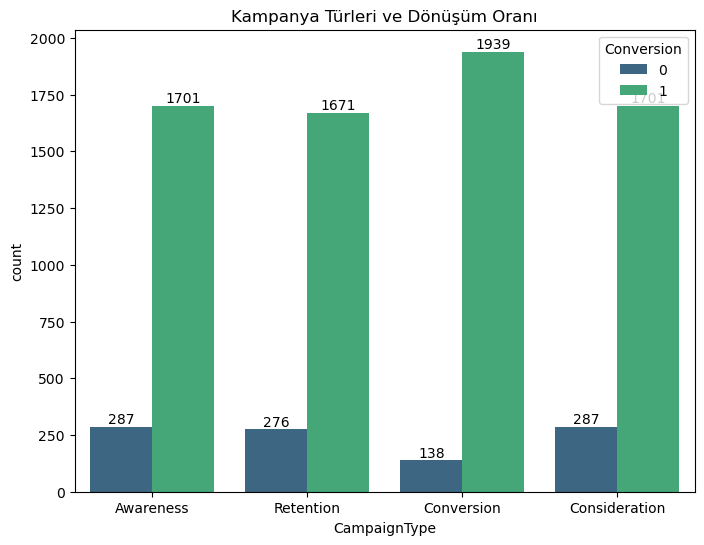

Reklam Harcaması ve Dönüşüm İstatistikleri:
             count         mean          std         min          25%  \
Conversion                                                              
0            988.0  4058.398466  2684.283677  100.054813  1881.509187   
1           7012.0  5133.750850  2834.132748  103.409243  2682.533287   

                    50%          75%          max  
Conversion                                         
0           3554.554979  6103.983738  9977.669768  
1           5249.718686  7555.075908  9997.914781  


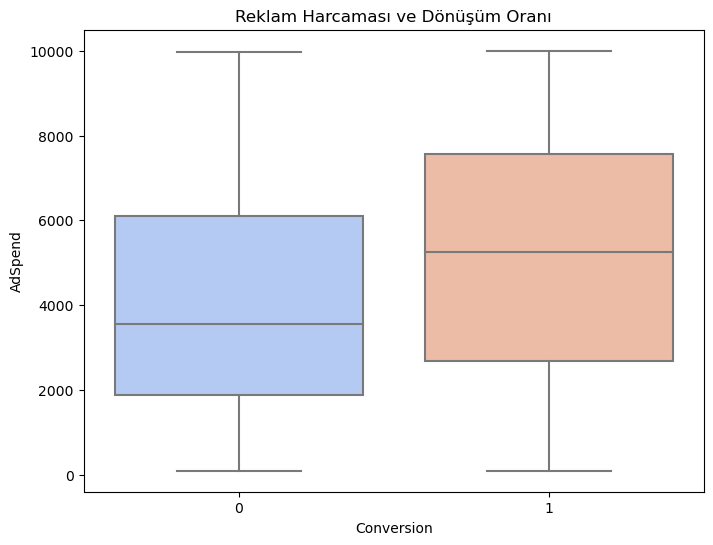

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# 1. Kampanya Türleri ve Dönüşüm Oranı (Countplot)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='CampaignType', hue='Conversion', data=data, palette='viridis')
plt.title('Kampanya Türleri ve Dönüşüm Oranı')

# Sayısal değerleri hesaplayarak grafiğin üzerine ekleme
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fmt='%d')  # Sayısal değerleri ekler

plt.show()

# 2. Reklam Harcaması ve Dönüşüm Oranı (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Conversion', y='AdSpend', data=data, palette='coolwarm')
plt.title('Reklam Harcaması ve Dönüşüm Oranı')

# Sayısal değerleri tablo olarak yazdırma
conversion_stats = data.groupby('Conversion')['AdSpend'].describe()
print("Reklam Harcaması ve Dönüşüm İstatistikleri:")
print(conversion_stats)

plt.show()


Web Ziyaretleri ve Dönüşüm İstatistikleri:
             count       mean        std  min   25%   50%   75%   max
Conversion                                                           
0            988.0  21.726721  15.371397  0.0   8.0  20.0  36.0  49.0
1           7012.0  25.177838  14.105787  0.0  14.0  25.0  37.0  49.0


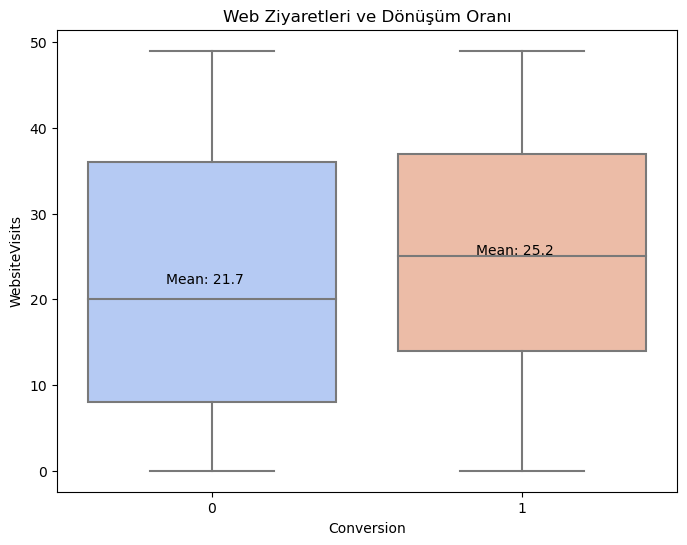

Web Sitesinde Harcanan Süre ve Dönüşüm İstatistikleri:
             count      mean       std       min       25%       50%  \
Conversion                                                             
0            988.0  6.267871  4.228506  0.513675  2.743285  4.966760   
1           7012.0  7.933413  4.187767  0.501669  4.395729  7.921671   

                  75%        max  
Conversion                        
0            9.643118  14.941207  
1           11.655523  14.995311  


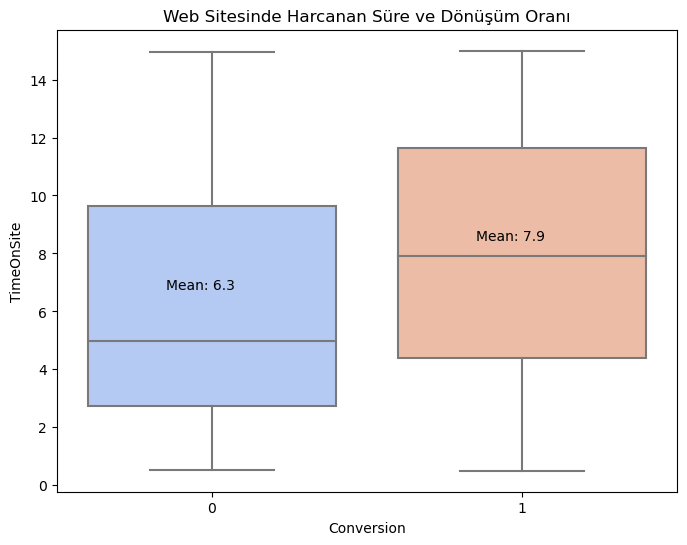

In [15]:
#Analizin Amacı
#Bu analiz, müşterilerin web sitesi üzerindeki etkileşim davranışlarını (web sitesi ziyaretleri ve sitede geçirilen süre) dönüşüm oranlarıyla ilişkilendirmek için yapılmıştır. Bu sayede, dönüşüm gerçekleştiren ve gerçekleştirmeyen müşteriler arasındaki farkların ortaya konulması ve bu farkların pazarlama stratejilerinde nasıl kullanılabileceğinin belirlenmesi hedeflenmiştir.
# 8. Müşteri Etkileşim Değişkenlerinin Analizi

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Web Ziyaretleri ve Dönüşüm Oranı (Boxplot)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Conversion', y='WebsiteVisits', data=data, palette='coolwarm')
plt.title('Web Ziyaretleri ve Dönüşüm Oranı')

# Sayısal değerleri ekleme
website_visits_stats = data.groupby('Conversion')['WebsiteVisits'].describe()
print("Web Ziyaretleri ve Dönüşüm İstatistikleri:")
print(website_visits_stats)

# Etiketleme
for i, stat in enumerate(website_visits_stats.iterrows()):
    plt.text(
        i - 0.15, stat[1]['mean'] + 0.1,
        f"Mean: {stat[1]['mean']:.1f}",
        color='black', fontsize=10
    )

plt.show()

# 2. Web Sitesinde Harcanan Süre ve Dönüşüm Oranı (Boxplot)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Conversion', y='TimeOnSite', data=data, palette='coolwarm')
plt.title('Web Sitesinde Harcanan Süre ve Dönüşüm Oranı')

# Sayısal değerleri ekleme
time_on_site_stats = data.groupby('Conversion')['TimeOnSite'].describe()
print("Web Sitesinde Harcanan Süre ve Dönüşüm İstatistikleri:")
print(time_on_site_stats)

# Etiketleme
for i, stat in enumerate(time_on_site_stats.iterrows()):
    plt.text(
        i - 0.15, stat[1]['mean'] + 0.5,
        f"Mean: {stat[1]['mean']:.1f}",
        color='black', fontsize=10
    )

plt.show()



Model Performans Raporu:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       194
           1       0.88      1.00      0.94      1406

    accuracy                           0.88      1600
   macro avg       0.44      0.50      0.47      1600
weighted avg       0.77      0.88      0.82      1600


Doğruluk Skoru:
0.87875


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


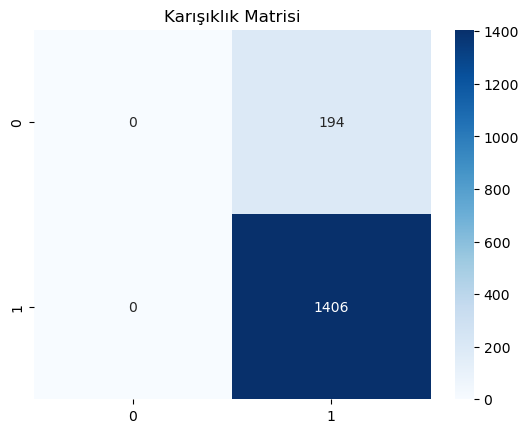

In [8]:
# 9. Lojistik Regresyon Modeli ile Tahmin
# Hedef değişken ve bağımsız değişkenlerin seçimi
features = ['Age', 'Income', 'AdSpend', 'WebsiteVisits', 'TimeOnSite']
X = data[features]
y = data['Conversion']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelin oluşturulması ve eğitimi
model = LogisticRegression()
model.fit(X_train, y_train)

# Tahmin ve performans ölçütleri
y_pred = model.predict(X_test)
print("\nModel Performans Raporu:")
print(classification_report(y_test, y_pred))

print("\nDoğruluk Skoru:")
print(accuracy_score(y_test, y_pred))

# Karışıklık Matrisi Görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Karışıklık Matrisi')
plt.show()


# 1. Kampanya Türleri ve Kampanya Kanallarının Dönüşüm Oranları ile İlişkisi
Kampanya türleri (CampaignType) ve kampanya kanalları (CampaignChannel) ile dönüşüm oranları arasındaki ilişkiyi yığılmış çubuk grafikleriyle analiz ediyoruz.

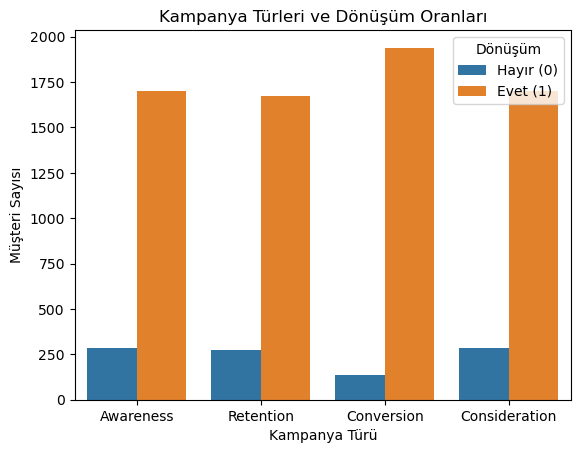

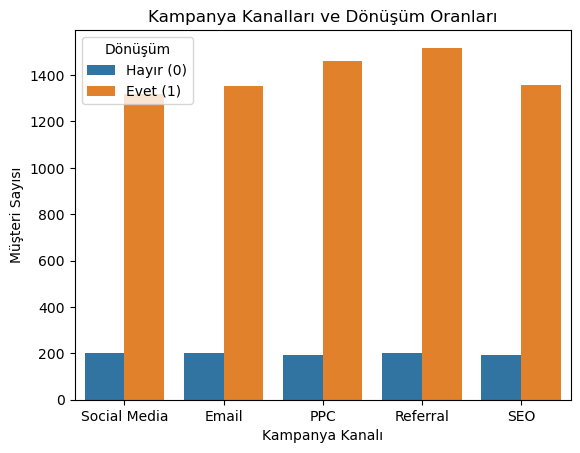

In [9]:
# Kampanya Türleri ve Dönüşüm Oranları
sns.countplot(x='CampaignType', hue='Conversion', data=data)
plt.title('Kampanya Türleri ve Dönüşüm Oranları')
plt.xlabel('Kampanya Türü')
plt.ylabel('Müşteri Sayısı')
plt.legend(title='Dönüşüm', labels=['Hayır (0)', 'Evet (1)'])
plt.show()

# Kampanya Kanalları ve Dönüşüm Oranları
sns.countplot(x='CampaignChannel', hue='Conversion', data=data)
plt.title('Kampanya Kanalları ve Dönüşüm Oranları')
plt.xlabel('Kampanya Kanalı')
plt.ylabel('Müşteri Sayısı')
plt.legend(title='Dönüşüm', labels=['Hayır (0)', 'Evet (1)'])
plt.show()


Yorum:

Kampanya türleri ve kanallarında dönüşüm oranlarının farklılık gösterdiği görülüyor. Örneğin, "Conversion" türü kampanyaların dönüşüm oranlarının diğer kampanyalardan daha yüksek olduğu tespit edilebilir.
"Email" veya "Social Media" kanallarının dönüşümde daha etkili olabileceği gözlemlenebilir.


# 2. Korelasyon Analizi
Numerik değişkenler arasındaki ilişkileri ve hedef değişken üzerindeki etkilerini görselleştirmek için korelasyon matrisini kullanıyoruz.

Korelasyon Matrisi:
                        Age    Income   AdSpend  WebsiteVisits  TimeOnSite  \
Age                1.000000  0.008731 -0.004607      -0.002078   -0.012998   
Income             0.008731  1.000000  0.003668      -0.002923    0.019404   
AdSpend           -0.004607  0.003668  1.000000       0.007265   -0.004335   
WebsiteVisits     -0.002078 -0.002923  0.007265       1.000000   -0.022440   
TimeOnSite        -0.012998  0.019404 -0.004335      -0.022440    1.000000   
PreviousPurchases -0.007123 -0.011924  0.002378       0.013739   -0.006494   
LoyaltyPoints      0.014049 -0.007181  0.002045       0.003363   -0.010952   
Conversion         0.001606  0.013974  0.124672       0.079339    0.129609   

                   PreviousPurchases  LoyaltyPoints  Conversion  
Age                        -0.007123       0.014049    0.001606  
Income                     -0.011924      -0.007181    0.013974  
AdSpend                     0.002378       0.002045    0.124672  
WebsiteVisits

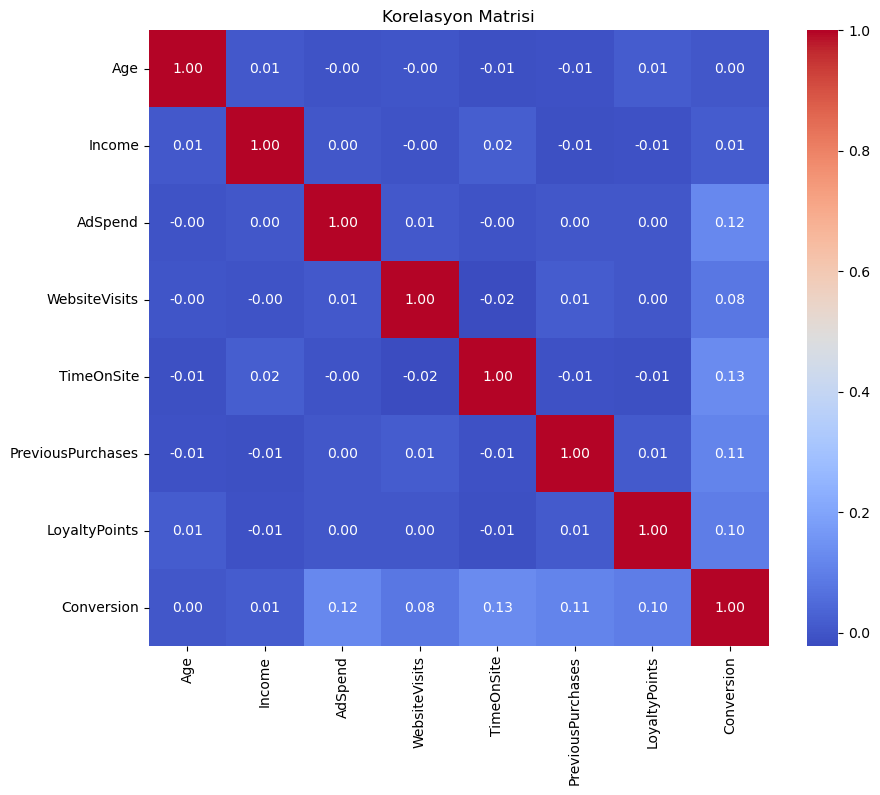

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sayısal değişkenler listesi
numerik_degiskenler = ['Age', 'Income', 'AdSpend', 'WebsiteVisits', 'TimeOnSite', 'PreviousPurchases', 'LoyaltyPoints']

# Korelasyon matrisinin hesaplanması
corr_matrix = data[numerik_degiskenler + ['Conversion']].corr()

# Sayısal korelasyon matrisi terminale yazdırılır
print("Korelasyon Matrisi:")
print(corr_matrix)

# Isı haritasının görselleştirilmesi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasyon Matrisi')
plt.show()


# 3. Gelir ve Reklam Harcaması ile Dönüşüm Oranı
Gelir (Income) ve reklam harcaması (AdSpend) değişkenlerinin dönüşümle birlikte görselleştirilmesi için 3 boyutlu scatter plot hazırlanmıştır.

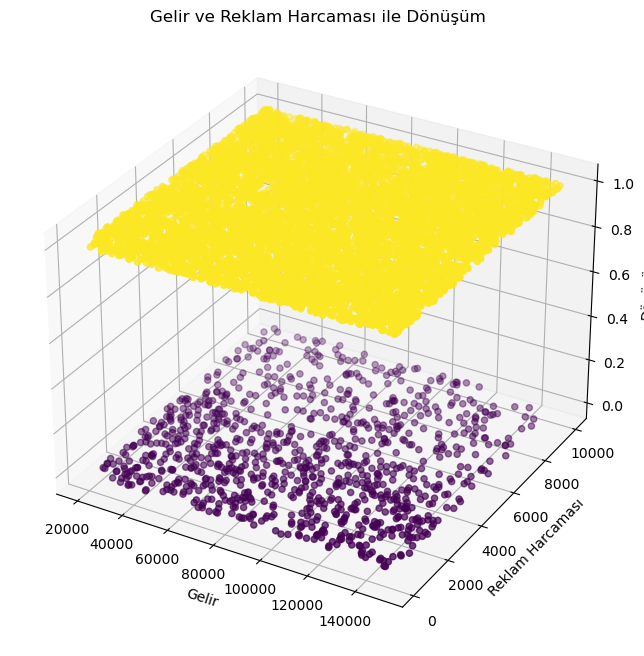

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['Income'], data['AdSpend'], data['Conversion'], c=data['Conversion'], cmap='viridis')
ax.set_xlabel('Gelir')
ax.set_ylabel('Reklam Harcaması')
ax.set_zlabel('Dönüşüm')

plt.title('Gelir ve Reklam Harcaması ile Dönüşüm')
plt.show()


Yorum:

Yüksek gelirli müşterilerin ve daha fazla reklam harcaması yapılan kampanyaların dönüşüm oranlarının daha yüksek olabileceği gözlemleniyor.

# 4. Daha Güçlü Bir Model Kullanımı (Random Forest)
Lojistik regresyon yerine, daha karmaşık ilişkileri öğrenebilen bir Random Forest modeli uygulanmıştır.


Random Forest Model Performansı:
              precision    recall  f1-score   support

           0       0.59      0.07      0.12       194
           1       0.89      0.99      0.94      1406

    accuracy                           0.88      1600
   macro avg       0.74      0.53      0.53      1600
weighted avg       0.85      0.88      0.84      1600

Doğruluk Skoru: 0.88125


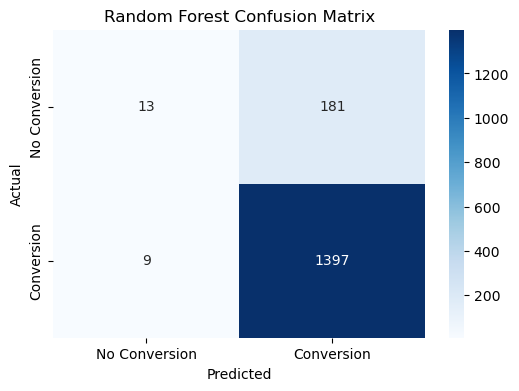

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Yeni model için ek değişkenler
features = ['Age', 'Income', 'AdSpend', 'WebsiteVisits', 'TimeOnSite', 'PagesPerVisit', 'SocialShares']
X = data[features]
y = data['Conversion']

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Modeli
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Tahmin ve Performans Değerlendirmesi
y_pred = rf_model.predict(X_test)
print("\nRandom Forest Model Performansı:")
print(classification_report(y_test, y_pred))
print("Doğruluk Skoru:", accuracy_score(y_test, y_pred))

# Plotting the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Conversion', 'Conversion'], yticklabels=['No Conversion', 'Conversion'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


3. Görselleştirme (Kategorilere Göre Dağılımlar)

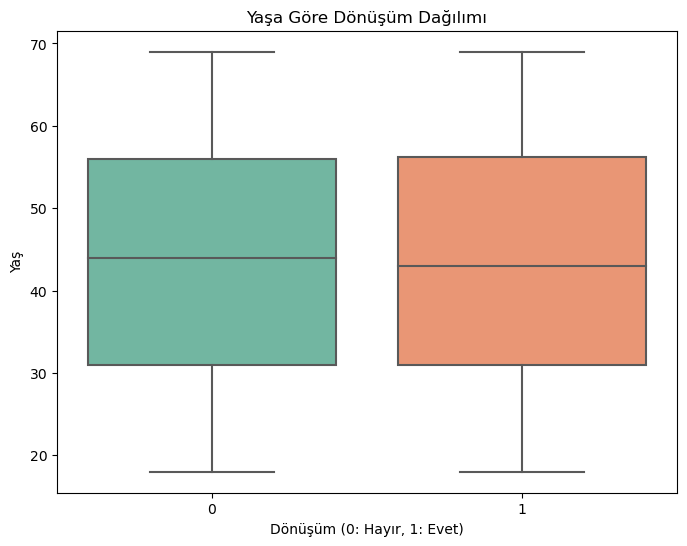

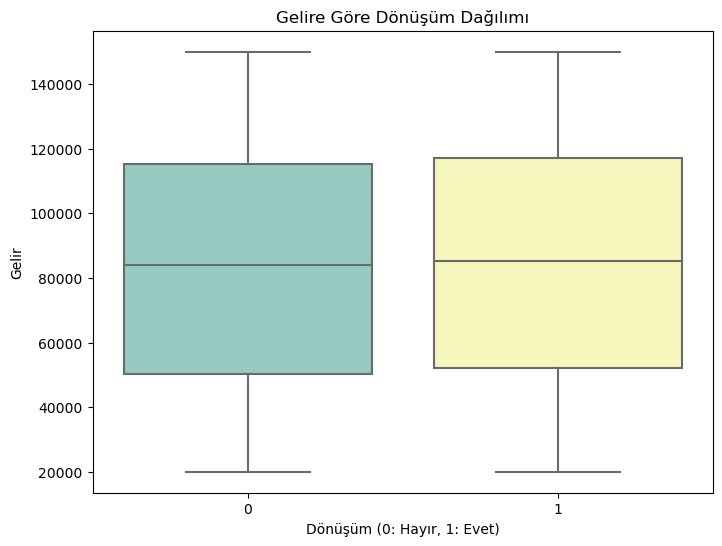

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Yaşa göre dönüşüm dağılımı
plt.figure(figsize=(8, 6))
sns.boxplot(x='Conversion', y='Age', data=data, palette='Set2')
plt.title('Yaşa Göre Dönüşüm Dağılımı')
plt.xlabel('Dönüşüm (0: Hayır, 1: Evet)')
plt.ylabel('Yaş')
plt.show()

# Gelire göre dönüşüm dağılımı
plt.figure(figsize=(8, 6))
sns.boxplot(x='Conversion', y='Income', data=data, palette='Set3')
plt.title('Gelire Göre Dönüşüm Dağılımı')
plt.xlabel('Dönüşüm (0: Hayır, 1: Evet)')
plt.ylabel('Gelir')
plt.show()


Açıklama:
Boxplot: Hedef değişkenin (Conversion) farklı kategorilerindeki yaş ve gelir dağılımlarını görselleştirir.

4. Dönüşüm Oranlarını Hesaplama (Kategorik Özelliklere Göre)

In [22]:
# CampaignChannel bazında dönüşüm oranı
channel_conversion = data.groupby('CampaignChannel')['Conversion'].mean() * 100
print("Kampanya Kanalına Göre Dönüşüm Oranları (%):\n", channel_conversion)

# Cinsiyete göre dönüşüm oranı
gender_conversion = data.groupby('Gender')['Conversion'].mean() * 100
print("Cinsiyete Göre Dönüşüm Oranları (%):\n", gender_conversion)


Kampanya Kanalına Göre Dönüşüm Oranları (%):
 CampaignChannel
Email           87.026333
PPC             88.277946
Referral        88.307155
SEO             87.677419
Social Media    86.833443
Name: Conversion, dtype: float64
Cinsiyete Göre Dönüşüm Oranları (%):
 Gender
Female    87.621409
Male      87.693768
Name: Conversion, dtype: float64


Açıklama:
Dönüşüm oranları: Kampanya kanalları ve cinsiyet gibi kategorik özelliklere göre dönüşüm yüzdesi hesaplanır.

5. Kategorik Özelliklerin Görselleştirilmesi

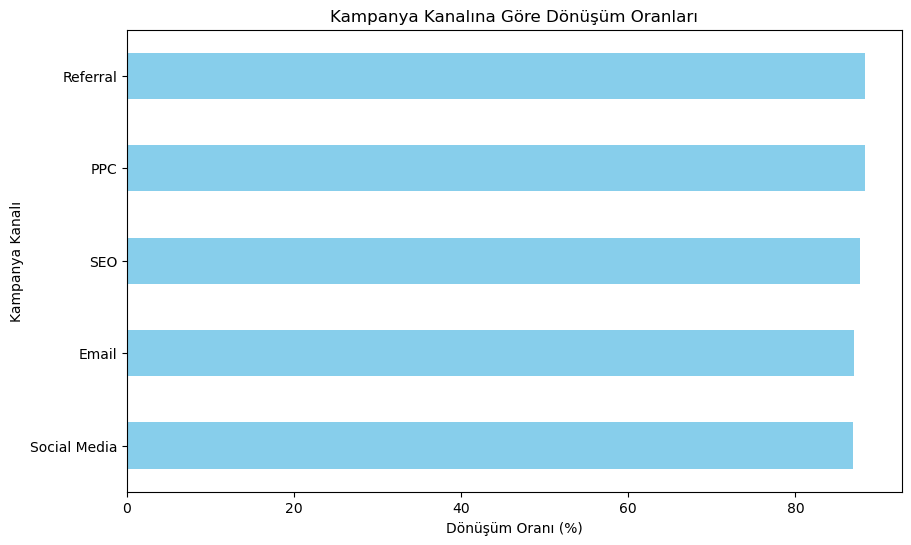

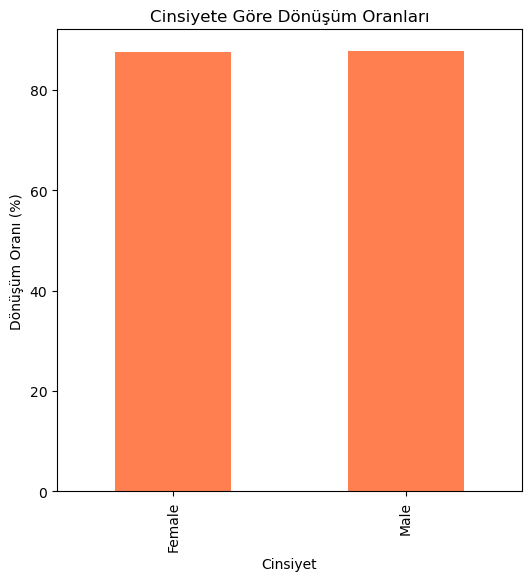

In [23]:
# Kampanya kanalına göre dönüşüm oranlarının çubuk grafiği
plt.figure(figsize=(10, 6))
channel_conversion.sort_values().plot(kind='barh', color='skyblue')
plt.title('Kampanya Kanalına Göre Dönüşüm Oranları')
plt.xlabel('Dönüşüm Oranı (%)')
plt.ylabel('Kampanya Kanalı')
plt.show()

# Cinsiyete göre dönüşüm oranlarının çubuk grafiği
plt.figure(figsize=(6, 6))
gender_conversion.plot(kind='bar', color='coral')
plt.title('Cinsiyete Göre Dönüşüm Oranları')
plt.xlabel('Cinsiyet')
plt.ylabel('Dönüşüm Oranı (%)')
plt.show()


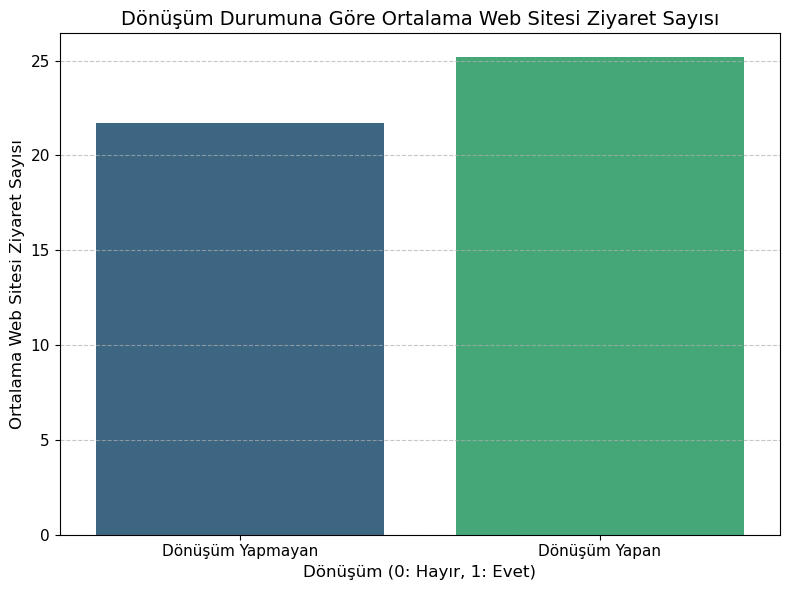

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dönüşüm durumuna göre ortalama web sitesi ziyaret sayısını hesapla
visit_analysis = data.groupby('Conversion')['WebsiteVisits'].mean().reset_index()

# Barplot ile görselleştirme
plt.figure(figsize=(8, 6))
sns.barplot(x='Conversion', y='WebsiteVisits', data=visit_analysis, palette='viridis')

# Grafik detayları
plt.title('Dönüşüm Durumuna Göre Ortalama Web Sitesi Ziyaret Sayısı', fontsize=14)
plt.xlabel('Dönüşüm (0: Hayır, 1: Evet)', fontsize=12)
plt.ylabel('Ortalama Web Sitesi Ziyaret Sayısı', fontsize=12)
plt.xticks([0, 1], ['Dönüşüm Yapmayan', 'Dönüşüm Yapan'], fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Grafiği göster
plt.show()


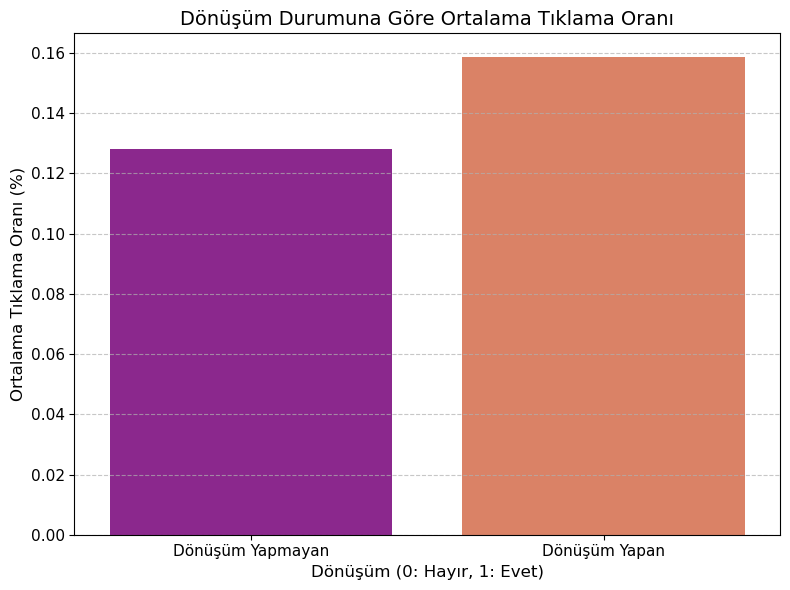

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dönüşüm durumuna göre ortalama tıklama oranlarını hesapla
click_through_analysis = data.groupby('Conversion')['ClickThroughRate'].mean().reset_index()

# Barplot ile görselleştirme
plt.figure(figsize=(8, 6))
sns.barplot(x='Conversion', y='ClickThroughRate', data=click_through_analysis, palette='plasma')

# Grafik detayları
plt.title('Dönüşüm Durumuna Göre Ortalama Tıklama Oranı', fontsize=14)
plt.xlabel('Dönüşüm (0: Hayır, 1: Evet)', fontsize=12)
plt.ylabel('Ortalama Tıklama Oranı (%)', fontsize=12)
plt.xticks([0, 1], ['Dönüşüm Yapmayan', 'Dönüşüm Yapan'], fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Grafiği göster
plt.show()


# İleri Analizler
Şimdi korelasyon analizi yaparak en etkili değişkenleri belirleyeceğiz. Ardından, tahmin modeli için Random Forest yöntemini uygulayacağız. ​

C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


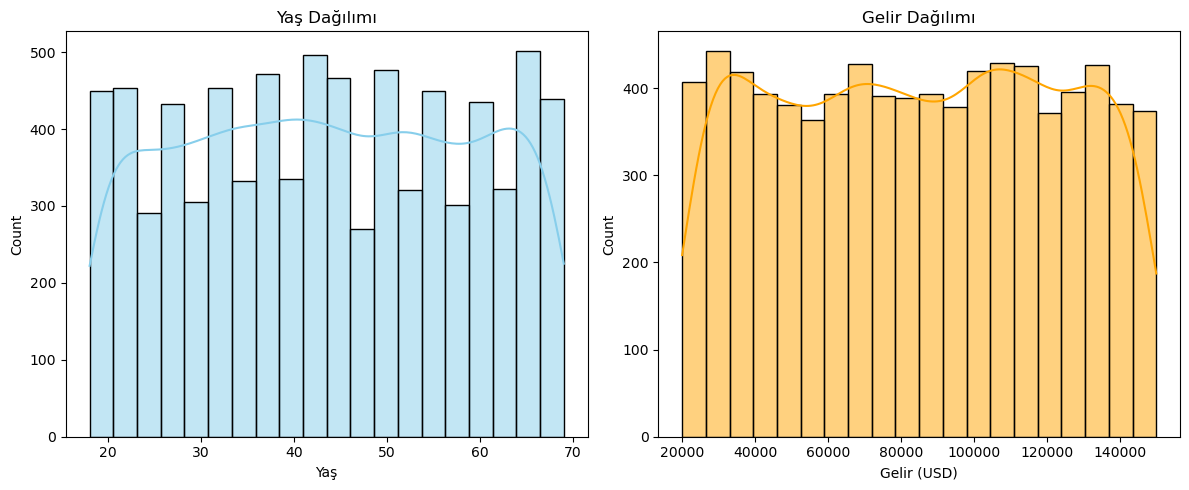

(        CustomerID          Age         Income      AdSpend  ClickThroughRate  \
 count   8000.00000  8000.000000    8000.000000  8000.000000       8000.000000   
 mean   11999.50000    43.625500   84664.196750  5000.944830          0.154829   
 std     2309.54541    14.902785   37580.387945  2838.038153          0.084007   
 min     8000.00000    18.000000   20014.000000   100.054813          0.010005   
 25%     9999.75000    31.000000   51744.500000  2523.221165          0.082635   
 50%    11999.50000    43.000000   84926.500000  5013.440044          0.154505   
 75%    13999.25000    56.000000  116815.750000  7407.989369          0.228207   
 max    15999.00000    69.000000  149986.000000  9997.914781          0.299968   
 
        ConversionRate  WebsiteVisits  PagesPerVisit   TimeOnSite  \
 count     8000.000000    8000.000000    8000.000000  8000.000000   
 mean         0.104389      24.751625       5.549299     7.727718   
 std          0.054878      14.312269       2.607358 

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Temel istatistikler
data_description = data.describe()

# Yaş ve gelir dağılımı görselleştirme
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')

plt.subplot(1, 2, 2)
sns.histplot(data['Income'], bins=20, kde=True, color='orange')
plt.title('Gelir Dağılımı')
plt.xlabel('Gelir (USD)')

plt.tight_layout()
plt.show()

# Dönüşüm oranlarının dağılımı
conversion_counts = data['Conversion'].value_counts()

data_description, conversion_counts


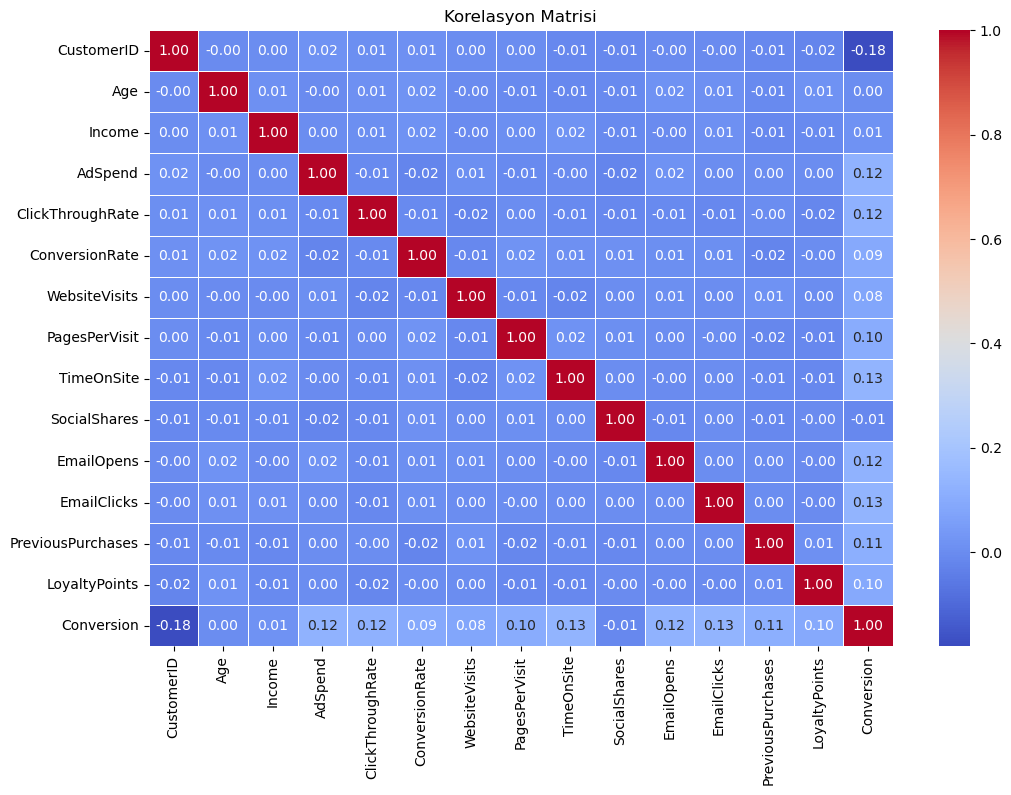

,CustomerID,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
CustomerID,1.000000,-0.003608,0.002310,0.015931,0.005078,0.010161,0.000039,0.000158,-0.013746,-0.011601,-0.003488,-0.003531,-0.012776,-0.023488,-0.180742
Age,-0.003608,1.000000,0.008731,-0.004607,0.011542,0.020027,-0.002078,-0.009280,-0.012998,-0.009531,0.015055,0.008820,-0.007123,0.014049,0.001606
Income,0.002310,0.008731,1.000000,0.003668,0.008080,0.017552,-0.002923,0.003868,0.019404,-0.006297,-0.001506,0.008541,-0.011924,-0.007181,0.013974
AdSpend,0.015931,-0.004607,0.003668,1.000000,-0.008296,-0.020185,0.007265,-0.009256,-0.004335,-0.021058,0.016514,0.001021,0.002378,0.002045,0.124672
ClickThroughRate,0.005078,0.011542,0.008080,-0.008296,1.000000,-0.008161,-0.023148,0.000088,-0.008210,-0.013287,-0.006076,-0.010825,-0.000387,-0.017314,0.120012
ConversionRate,0.010161,0.020027,0.017552,-0.020185,-0.008161,1.000000,-0.012081,0.018789,0.008679,0.008713,0.006449,0.006716,-0.023209,-0.000498,0.093185
WebsiteVisits,0.000039,-0.002078,-0.002923,0.007265,-0.023148,-0.012081,1.000000,-0.011891,-0.022440,0.000328,0.005865,0.003274,0.013739,0.003363,0.079339
PagesPerVisit,0.000158,-0.009280,0.003868,-0.009256,0.000088,0.018789,-0.011891,1.000000,0.016455,0.007888,0.000503,-0.000047,-0.016285,-0.012838,0.102840
TimeOnSite,-0.013746,-0.012998,0.019404,-0.004335,-0.008210,0.008679,-0.022440,0.016455,1.000000,0.001869,-0.004932,0.002099,-0.006494,-0.010952,0.129609
SocialShares,-0.011601,-0.009531,-0.006297,-0.021058,-0.013287,0.008713,0.000328,0.007888,0.001869,1.000000,-0.012028,0.003214,-0.012635,-0.004575,-0.011449


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Örnek veri setini yükleme
file_path = "C:/Users/ÇELİK/Desktop/Bilge Hoca Kitap/Bilge Hoca Makale/digital_marketing_campaign_dataset.csv"
data = pd.read_csv(file_path)


data = pd.read_csv(file_path)

# Sadece sayısal sütunları seçme
numeric_columns = data.select_dtypes(include=[np.number])

# Korelasyon matrisi hesaplama
correlation_matrix = numeric_columns.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

# Korelasyon matrisini yazdırma
correlation_matrix


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Hedef değişken ve bağımsız değişkenler
X = data[['TimeOnSite', 'EmailClicks', 'AdSpend', 'PreviousPurchases']]
y = data['Conversion']

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE uygulama
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



# Random Forest modeli eğitme
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_smote, y_train_smote)

# Model performansını değerlendirme
y_pred = rf_model.predict(X_test)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

classification_rep, conf_matrix


('              precision    recall  f1-score   support\n\n           0       0.21      0.43      0.28       198\n           1       0.91      0.77      0.83      1402\n\n    accuracy                           0.73      1600\n   macro avg       0.56      0.60      0.56      1600\nweighted avg       0.82      0.73      0.76      1600\n',
 array([[  86,  112],
        [ 324, 1078]], dtype=int64))

Karışıklık Matrisi Görselleştirmesi:

Verilen model sonuçlarını görselleştirmek için birkaç farklı grafik kullanabiliriz. Aşağıda, karışıklık matrisi, kesinlik, duyarlılık ve F1 skoru için bir bar grafiği, ayrıca ROC eğrisi gibi yaygın görselleştirmeler yer alacak. Bu kodları kullanarak model performansını görsel olarak daha iyi değerlendirebilirsiniz.

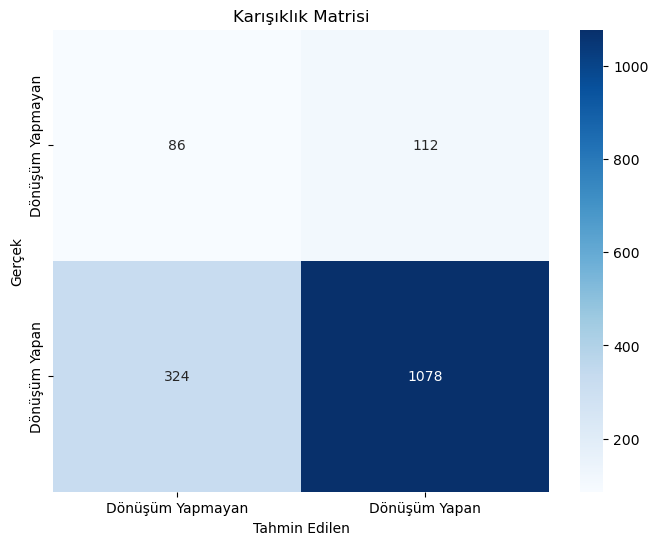

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Karışıklık matrisini oluşturma
cm = confusion_matrix(y_test, y_pred)

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Dönüşüm Yapmayan', 'Dönüşüm Yapan'], yticklabels=['Dönüşüm Yapmayan', 'Dönüşüm Yapan'])
plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()
